**Comparing Classifcation Algorithms**

In [22]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=1000, centers=2, cluster_std=1, n_features=2, random_state=0)

In [23]:
y[1:10]

array([0, 0, 1, 1, 0, 1, 0, 0, 1])

Text(0.5, 1.0, 'Three Classes Classifciation')

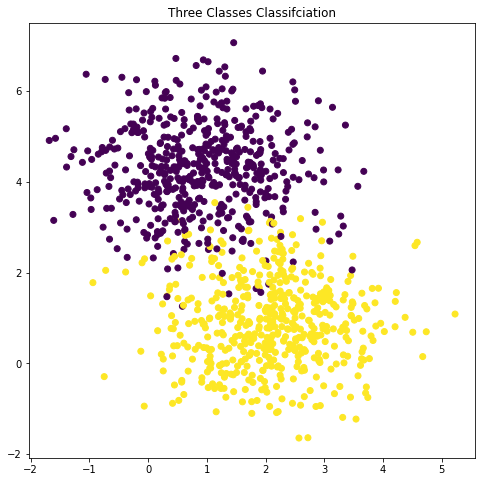

In [24]:
import numpy as np
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 8))
plt.scatter(X[:,0], X[:, 1], c=y)
plt.title("Three Classes Classifciation")

In [25]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

In [26]:
models

[('LR', LogisticRegression()),
 ('LDA', LinearDiscriminantAnalysis()),
 ('KNN', KNeighborsClassifier()),
 ('CART', DecisionTreeClassifier()),
 ('NB', GaussianNB()),
 ('SVM', SVC())]

In [27]:
#Split into train and test set using sklearn model_selection
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=7)
# Feature Scaling
from sklearn.preprocessing import StandardScaler 
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [28]:
results = []
names = []
seed=42
for name, model in models:
    kfold = KFold(n_splits=10, random_state=seed, shuffle=True)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold,          scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print(f"{name}, {cv_results.mean()}, {cv_results.std()}))")

LR, 0.9525, 0.02150581316760656))
LDA, 0.9525, 0.022220486043288957))
KNN, 0.93875, 0.021972994789058668))
CART, 0.925, 0.029047375096555618))
NB, 0.9525, 0.022220486043288957))
SVM, 0.9524999999999999, 0.022220486043288964))


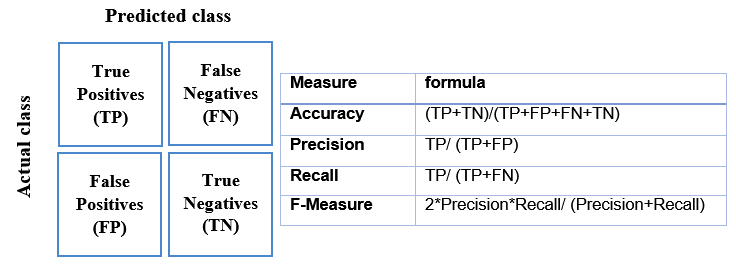

In [29]:
from IPython.display import Image
Image('confusionMatrix.png')

**Picking best model**

In [30]:
cls = GaussianNB()
cls.fit(X_train,y_train)
y_pred = cls.predict(X_test)
print('--------------------------------------------------------')

print("------- Accuracy --------\n")
print(accuracy_score(y_test,y_pred))
print('--------------------------------------------------------')

print("------- Confusion Matrix --------\n")

print(confusion_matrix(y_test,y_pred))

print('--------------------------------------------------------')


print("------- Classifcation Report-------- \n")


print(classification_report(y_test,y_pred))

print('--------------------------------------------------------')


--------------------------------------------------------
------- Accuracy --------

0.96
--------------------------------------------------------
------- Confusion Matrix --------

[[95  2]
 [ 6 97]]
--------------------------------------------------------
------- Classifcation Report-------- 

              precision    recall  f1-score   support

           0       0.94      0.98      0.96        97
           1       0.98      0.94      0.96       103

    accuracy                           0.96       200
   macro avg       0.96      0.96      0.96       200
weighted avg       0.96      0.96      0.96       200

--------------------------------------------------------
